#student Score






Aim:
    Calculte the students score predictions depends on the our of study.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset=pd.read_csv("E:/kebila/data science/Notes/ML/student_scores.csv")
#dataset = pd.read_csv("C:/Users/Arun R\Desktop\Board_Infinity\Python/Raw_File_main/student_scores.csv")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.shape

(25, 2)

In [7]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


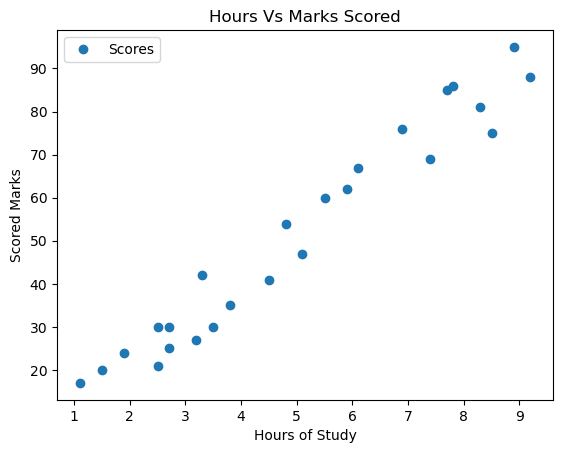

In [8]:
dataset.plot(x='Hours',y='Scores',style='o')
plt.title("Hours Vs Marks Scored")
plt.xlabel('Hours of Study')
plt.ylabel('Scored Marks')
plt.show()

In [10]:
#Prepare my data
X=dataset.iloc[:,: -1]
Y=dataset.iloc[:,1]


In [11]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [12]:
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [13]:
X.shape


(25, 1)

In [14]:
Y.shape

(25,)

In [15]:
#Splitting training and splitting datas
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


In [16]:
X_train.head()

,Hours
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7


In [17]:
X_train.shape

(18, 1)

In [18]:
Y_train.head()

24    86
23    76
14    17
1     47
10    85
Name: Scores, dtype: int64

In [20]:
Y_train.shape

(18,)

In [21]:
X_test.shape

(7, 1)

In [22]:
Y_test.shape

(7,)

In [31]:
#Train the algorithm
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
print('Intercept:',regressor.intercept_)
print('Slope:',regressor.coef_)

Intercept: 1.9322042531516601
Slope: [9.94167834]


In [36]:
#Y=1.93*x+9.94
Y=9.94*7.5+1.93
Y

76.48

In [37]:
#Predictions:
Y_predict=regressor.predict(X_test)
Y_predict

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [38]:
Y_test

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [40]:
df=pd.DataFrame({'Actual':Y_test,
                'Predict':Y_predict})
df

,Actual,Predict
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [42]:
#Evaluate
from sklearn import metrics
#MAE
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_predict))
#MSE
print('Mean Square Error:',metrics.mean_squared_error(Y_test,Y_predict))
#RMSE
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

Mean Absolute Error: 4.130879918502482
Mean Square Error: 20.33292367497996
Root Mean Square Error: 4.509204328368805


In [43]:
from sklearn.metrics import r2_score
print('R2 Error:',metrics.r2_score(Y_test,Y_predict))

R2 Error: 0.9367661043365056


R2 is 93% (Above 75%) it is a very good model.

In [45]:
#Adjusted R2 Score
r2=(metrics.r2_score(Y_test,Y_predict))
n=5
k=1
adj_r2=1-(((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:",adj_r2)

Adjusted R2 Error: 0.9156881391153409
